# Some basic instructions to run jupyter-notebook

1. Different boxes containing code or text is called a cell.
2. To run a particular cell, click in that cell and press run option from above. 
3. To edit the cells containing text, double click in that respective cell to edit.
4. Each cell should be run sequentially, just like sub-sections in matlab.
5. In order to run all the cells click "kernel" from above and choose "Restart+Run All"

# A small tutorial on saving data using .pkl and .h5 formats
# Section I

Text(0,0.5,'Targets')

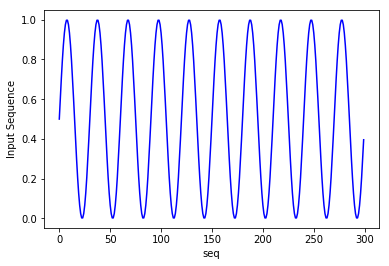

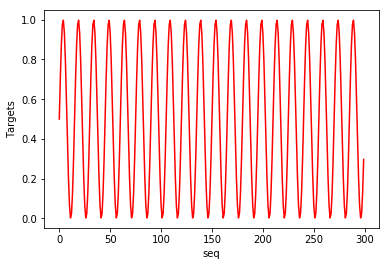

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pdb



BENCHMARK = 0
TRAINING_SEQ_SIZE = 300

def test_examples():
    
    # Frequency Doubler
    seq = np.array(range(TRAINING_SEQ_SIZE))
    N_POINTS = 30;
    #seq_fd = np.array(range(TRAINING_SEQ_SIZE))
    #x_fd = np.array(range(TRAINING_SEQ_SIZE))
    x_fd = 2*math.pi*seq/N_POINTS
    input_fd = (np.sin(x_fd) + 1)/2;
    targets_fd = (np.sin(2*x_fd)+1)/2;
    return input_fd, targets_fd
    

if  BENCHMARK == 0:
    inputs, targets = test_examples()
    data = {}
    data['inputs_fd']=inputs  ##Lets create a dictionary to pack the data to be saved.
    data['targets_fd']=targets
#    plt.plot(inputs[0:300],'r')
#    plt.plot(targets[0:300],'b')
      
plt.figure(1)
plt.xlabel('seq')
plt.ylabel('Input Sequence')
plt.plot(inputs,'b')
plt.show
plt.figure(2)
plt.plot(targets,'r')
plt.xlabel('seq')
plt.ylabel('Targets')

# Section II(a)
# Write Pickle files
The following file will write the contents of the variable "data" that was created in section I into a file with handle `file`. Remember that "data" was a dictionary.
<pre><code>
pickle.dump(data,file)
</code></pre>
    .pkl files are easy to create but they're not memory efficient. Not really suitable to save very large datasets.

In [9]:
import pickle
picklefile="sample"+".pkl" ##this will be the name of you file
path = "/home/ruthvik/Desktop/"  ## this is the path to the file.
file = open(path+picklefile,'wb') ##Note that the flag should be 'wb' for writing.
pickle.dump(data,file)  ##dump the data.
file.close()    ## ALWAYS close the file handle or else data will corrupt.

# Section II(b)
# Read Pickle files
The following file will read the contents of the file with handle `file` into a variable "my_data"  
<pre><code>
my_data = pickle.load(file)
</code></pre>
If we don't know about the data type of the variable "my_data" we can use `print(type(my_data))` to know more. Since we already know that we saved a dictionary, to know keys in the dictionary "my_data" we use `list(my_data.keys())`

In [10]:
file = open(path+picklefile,'rb')##Note that the flag should be 'rb' for reading.
my_data = pickle.load(file)        ##You read the file.
file.close() #you close it ALWAYS.

Text(0.5,1,'targets_fd')

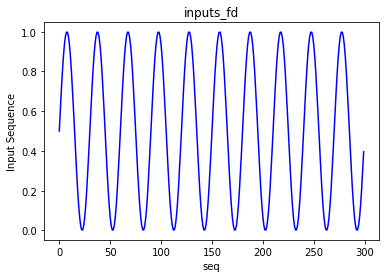

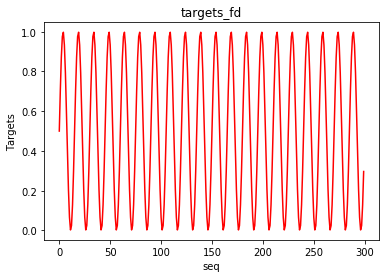

In [11]:
data_keys = list(my_data.keys())
plt.figure(1)
plt.xlabel('seq')
plt.ylabel('Input Sequence')
plt.plot(my_data[data_keys[0]],'b')  ##our input is now data['inputs']
plt.title(data_keys[0])
plt.show
plt.figure(2)
plt.plot(my_data[data_keys[1]],'r') ##our target is now data['targets']
plt.xlabel('seq')
plt.ylabel('Targets')
plt.title(data_keys[1])

# Section III(a)
# Writing HDF5 files

.h5 files are used to save very large datasets and are very efficient in how much RAM they use once opened in but they can be tricky to save multiple numpy arrays of different sizes. Below code will walk you through that.

# Create Group
We can save numpy arrays of different sizes/shapes or numpy arrays with size (N, ) by saving them as different datasets but under one group. 
<pre><code>
group=file.create_group('my_data')
</code></pre>
the above command will create a group, that we chose to call "my_data".

# Create Group members 
Now that we have created a group let's add group memebers(datasets) to it, the following lines will do that:
<pre><code>
for key,value in data.items():
    group.create_dataset(key,data=value)
</code></pre>
"data" is a dictionary that was created in the section I. We iterate over pairs of (keys,values) of that dictionary to create different members(datasets) of the group.

In [12]:
import h5py
filename="sample"+".h5"
file=h5py.File(path+filename,'w')  #file handle
group=file.create_group('my_data')
for key,value in data.items():
    group.create_dataset(key,data=value) ##create a group dataset with key, value pairs in the dict.

# Section III(b)
# Reading .h5 files
<pre><code>
file=h5py.File(path+filename,'r')
</code></pre>

The above line will read the file and `file` is our file handle.
If someone else had created this file you will not know how many groups are there in this .h5 file and what are their names. The following line will give us the names of the groups present this .h5 file in a list:
<pre><code>
a_group_key = list(file.keys())
print("Names of different groups in the .h5 file are:{}".format(group_keys))
</code></pre>

It printed `Names of different groups in the .h5 file are:['my_data']` so, it means that we have 1 group in this .h5 file. The following line will read the datasets in that one group.
<pre><code>
new_data=file[group_keys[0]]
</code></pre>

Now, we want to know what are the different datasets that are present in that group. The following line will do that:
<pre><code>
new_data_keys = list(new_data.keys())
print("Datasets with names {} are present in the group {}".format(new_data_keys,group_keys[0]))
</code></pre>

will print out `Datasets with names ['inputs_fd', 'targets_fd'] are present in the group my_data` indicating that we have 2 data sets under the group "my_data"


`new_data[new_data_keys[0]]` will read the contents of the first data set and `new_data[new_data_keys[1]]` will read the contents of the second dataset.

In [13]:
file=h5py.File(path+filename,'r')  ##read the file
group_keys = list(file.keys())    
print("Names of different groups in the .h5 file are:{}".format(group_keys))
new_data=file[group_keys[0]]         ##read all the data associated with a group
new_data_keys = list(new_data.keys())  
print("Datasets with names {} are present in the group {}".format(new_data_keys,group_keys[0]))

Names of different groups in the .h5 file are:['my_data']
Datasets with names ['inputs_fd', 'targets_fd'] are present in the group my_data


Text(0.5,1,'targets_fd')

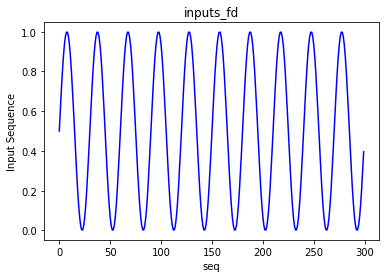

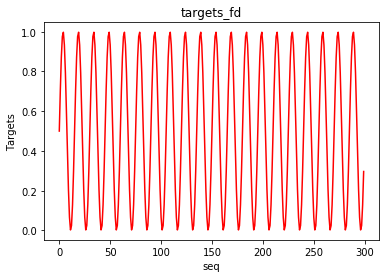

In [14]:

plt.figure(1)
plt.xlabel('seq')
plt.ylabel('Input Sequence')
plt.plot(new_data[new_data_keys[0]],'b')  ##our input is now data['inputs']
plt.title(new_data_keys[0])
plt.show
plt.figure(2)
plt.plot(new_data[new_data_keys[1]],'r') ##our target is now data['targets']
plt.xlabel('seq')
plt.ylabel('Targets')
plt.title(new_data_keys[1])